Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


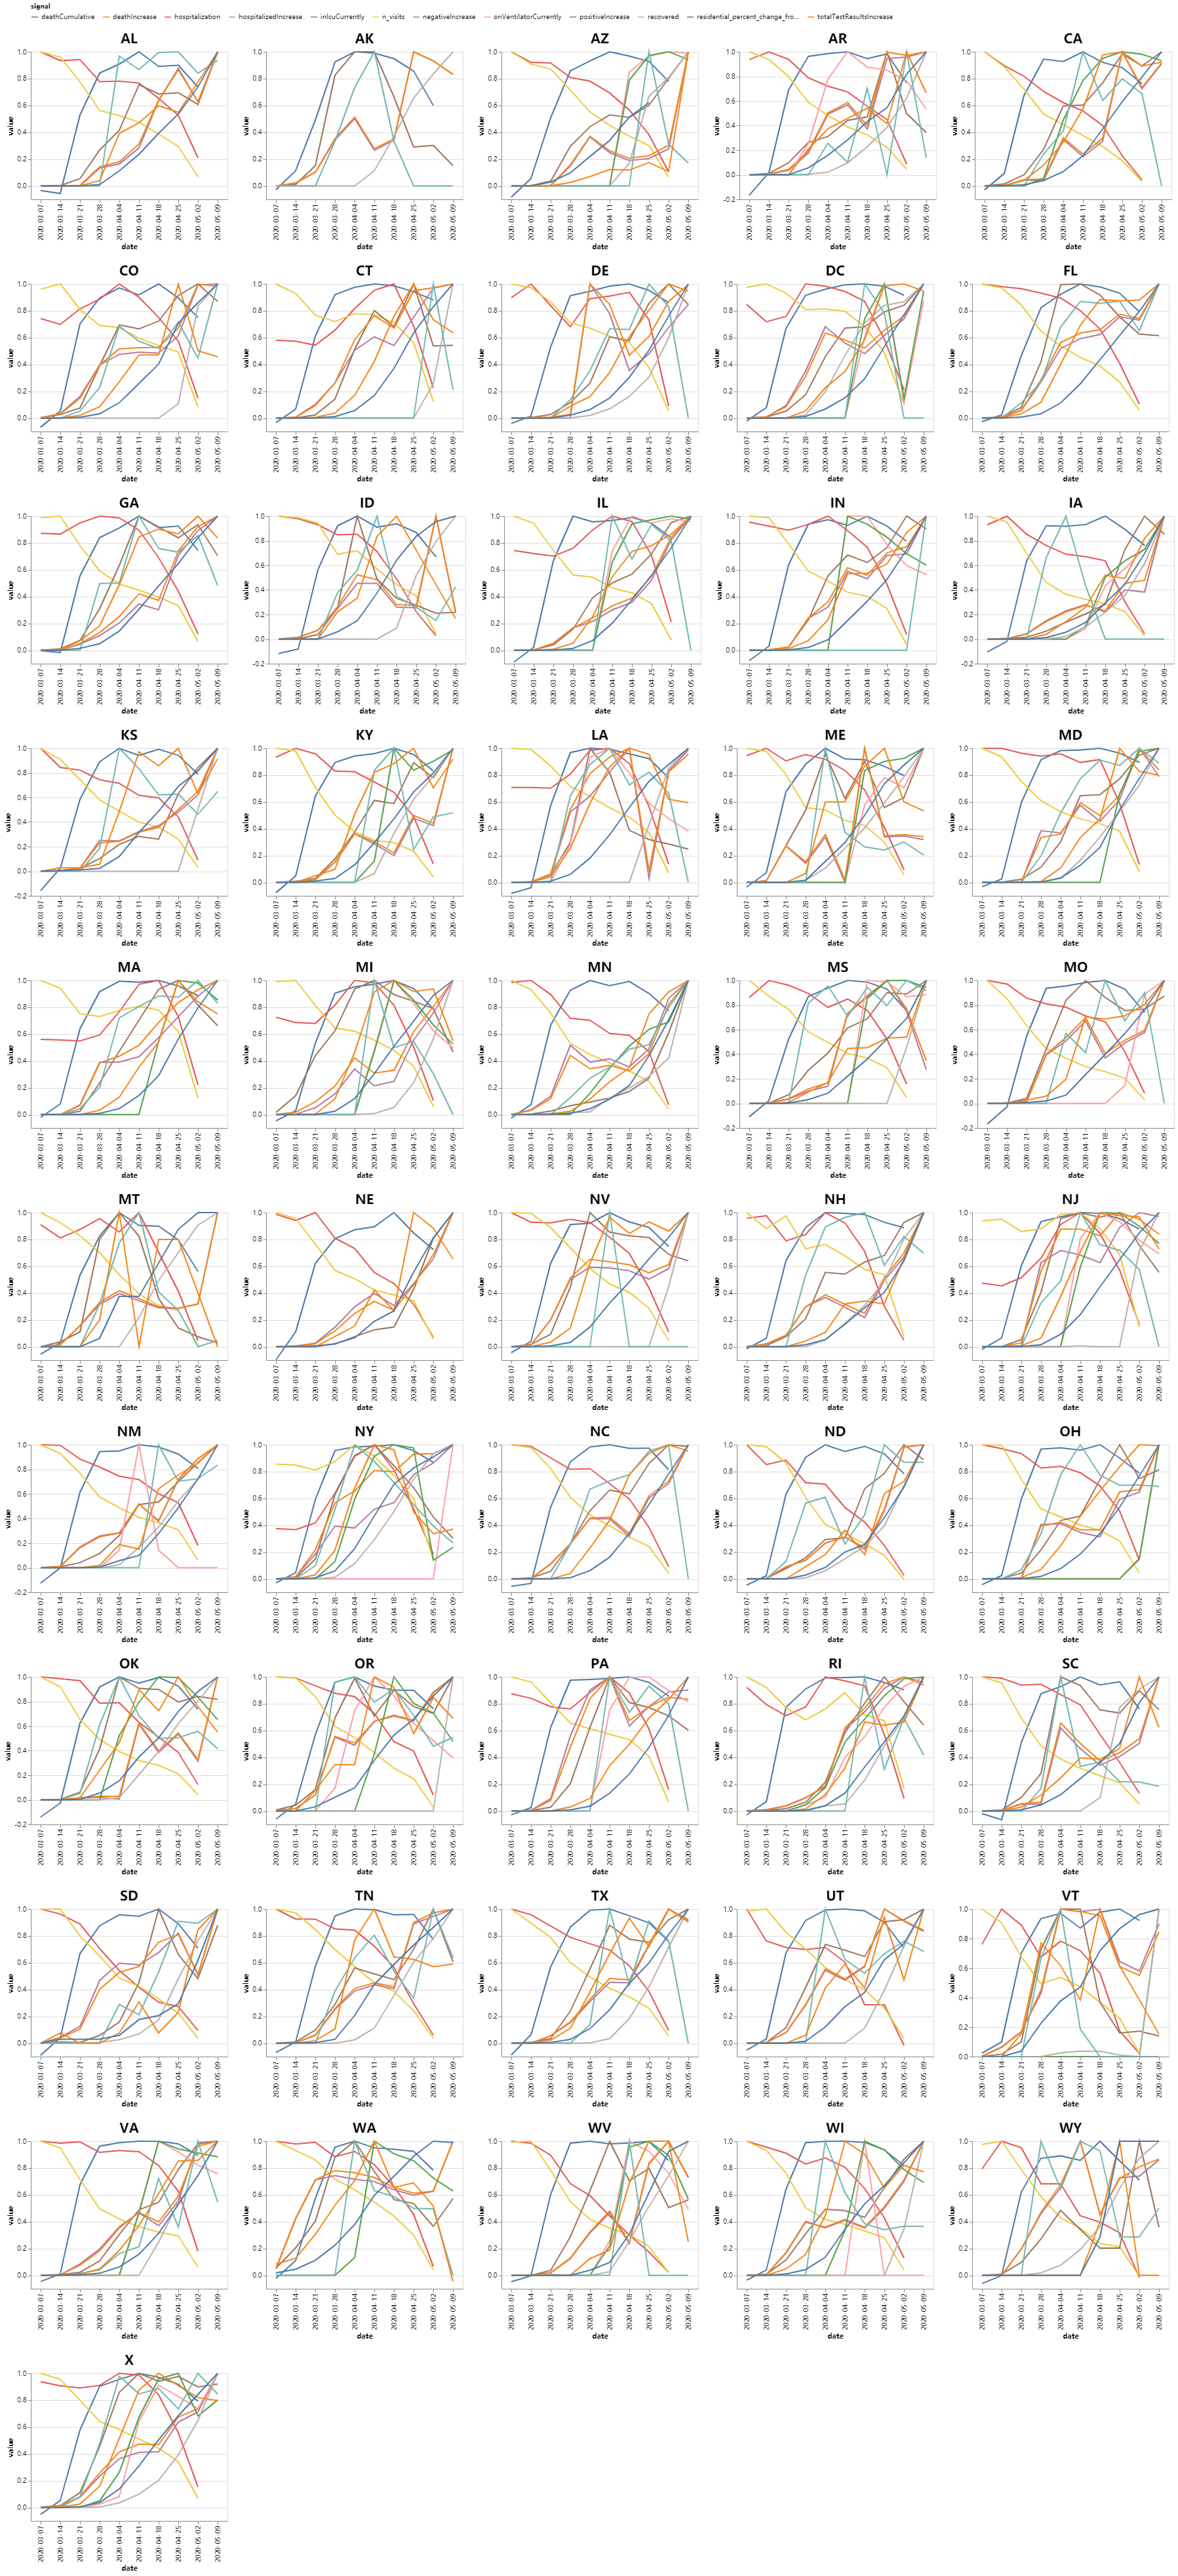

In [1]:
!pip install altair
import altair as alt
import pandas as pd
import numpy as np

# Global Parameters:
Weeks = 10 # How many weeks in the dataset
Signals = ['residential_percent_change_from_baseline', 'hospitalization', 'n_visits', 'positiveIncrease', 'negativeIncrease', 'totalTestResultsIncrease', 'onVentilatorCurrently', 'inIcuCurrently', 'recovered', 'hospitalizedIncrease', 'deathIncrease', 'deathCumulative']

MyData = pd.read_csv("covid-hospitalization-all-state-merged.csv")

ChartList = []

for state in range(51): # 50 States and one total
    Data = MyData.loc[Weeks*state:Weeks*state+9]
    DateList = []
    for week in range(Weeks):
        DateList.append(MyData.loc[Weeks*state+week]["date"])
    region = MyData.loc[Weeks*state+week]["region"]
    for column in Data.columns:
        if (column not in Signals):
            Data = Data.drop([column],axis=1)
    Data.columns.name = "signal"
    Data.index = DateList
    Data.index.name = "date"
    Data = Data/Data.max()
    Data = Data.reset_index().melt('date')

    chart = alt.Chart(Data).mark_line().encode(
        x='date',
        y='value',
        color='signal',
    ).properties(
        width=300,
        height=225,
        title = str(region),
    )
    
    ChartList.append(chart)
    
ChartList = (ChartList[1] | ChartList[2] | ChartList[3] | ChartList[4] | ChartList[5]) & (ChartList[6] | ChartList[7] | ChartList[8] | ChartList[9] | ChartList[10]) & (ChartList[11] | ChartList[12] | ChartList[13] | ChartList[14] | ChartList[15]) & (ChartList[16] | ChartList[17] | ChartList[18] | ChartList[19] | ChartList[20]) & (ChartList[21] | ChartList[22] | ChartList[23] | ChartList[24] | ChartList[25]) & (ChartList[26] | ChartList[27] | ChartList[28] | ChartList[29] | ChartList[30]) & (ChartList[31] | ChartList[32] | ChartList[33] | ChartList[34] | ChartList[35]) & (ChartList[36] | ChartList[37] | ChartList[38] | ChartList[39] | ChartList[40]) & (ChartList[41] | ChartList[42] | ChartList[43] | ChartList[44] | ChartList[45]) & (ChartList[46] | ChartList[47] | ChartList[48] | ChartList[49] | ChartList[50]) & (ChartList[0])
ChartList = ChartList.configure_legend(
    orient='top',
    titleFontSize=10,
    labelFontSize=10,
).configure_title(fontSize=20)

ChartList